In [1]:
# setup dependencies
import ssl
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import urllib2 
import urlparse

#open url and it's html
ctx = ssl.create_default_context()
ctx.check_hostname = False
ctx.verify_mode = ssl.CERT_NONE #don't worry about ssl certificate

url = 'https://www.cia.gov/library/publications/the-world-factbook/'

print("new connection")
print "Connecting to", url
print "Opening the file connection..." 
uh= urllib2.urlopen(url, context=ctx)
print "HTTP status",uh.getcode()
html =uh.read()
print "Reading done" 

new connection
Connecting to https://www.cia.gov/library/publications/the-world-factbook/
Opening the file connection...
HTTP status 200
Reading done


In [2]:
soup = BeautifulSoup(html, 'html.parser')

country_codes=[]
country_names=[]

for tag in soup.find_all('option'): #get all countries on drop down menu
    country_codes.append(tag.get('value')[5:7]) # get code so that we can modifiy URL
    country_names.append(tag.text) # get corresponding country names

print "removing from meaningless entries list"  
ToRemoveInd=country_names.index(" World ") #because the world section contains no useful info

country_codes[0:ToRemoveInd+1]=[] # Remove meaningless world-related entries
country_names[0:ToRemoveInd+1]=[] # Remove meaningless world-related entries

removing from meaningless entries list


In [3]:
# Get each country's info
urlBase = 'https://www.cia.gov/library/publications/the-world-factbook/geos/'
Country_data=dict()

for i in range(0,len(country_codes)):
    CountryInd=country_codes[i]
    urlCurrCountry=urlBase+CountryInd+".html" #produce URL for each entry on factbook
    #print urlCurrCountry
    CurrCountry= urllib2.urlopen(urlCurrCountry, context=ctx).read()
    soupCountry = BeautifulSoup(CurrCountry, 'html.parser')
    Country_data[i]=soupCountry.get_text()
    #print Country_data[CountryInd]
    print "Finished loading data for " + country_names[country_codes.index(CountryInd)]

Finished loading data for  Afghanistan 
Finished loading data for  Akrotiri 
Finished loading data for  Albania 
Finished loading data for  Algeria 
Finished loading data for  American Samoa 
Finished loading data for  Andorra 
Finished loading data for  Angola 
Finished loading data for  Anguilla 
Finished loading data for  Antarctica 
Finished loading data for  Antigua and Barbuda 
Finished loading data for  Arctic Ocean 
Finished loading data for  Argentina 
Finished loading data for  Armenia 
Finished loading data for  Aruba 
Finished loading data for  Ashmore and Cartier Islands 
Finished loading data for  Atlantic Ocean 
Finished loading data for  Australia 
Finished loading data for  Austria 
Finished loading data for  Azerbaijan 
Finished loading data for  Bahamas, The 
Finished loading data for  Bahrain 
Finished loading data for  Baker Island 
Finished loading data for  Bangladesh 
Finished loading data for  Barbados 
Finished loading data for  Belarus 
Finished loading data 

Finished loading data for  Saudi Arabia 
Finished loading data for  Senegal 
Finished loading data for  Serbia 
Finished loading data for  Seychelles 
Finished loading data for  Sierra Leone 
Finished loading data for  Singapore 
Finished loading data for  Sint Maarten 
Finished loading data for  Slovakia 
Finished loading data for  Slovenia 
Finished loading data for  Solomon Islands 
Finished loading data for  Somalia 
Finished loading data for  South Africa 
Finished loading data for  Southern Ocean 
Finished loading data for  South Georgia and South Sandwich Islands 
Finished loading data for  South Sudan 
Finished loading data for  Spain 
Finished loading data for  Spratly Islands 
Finished loading data for  Sri Lanka 
Finished loading data for  Sudan 
Finished loading data for  Suriname 
Finished loading data for  Svalbard 
Finished loading data for  Sweden 
Finished loading data for  Switzerland 
Finished loading data for  Syria 
Finished loading data for  Taiwan 
Finished loadi

In [ ]:
def get_data(searchTerm,searchTerm2,VOI, verbose):
    # get data based on searchTerm and SearchTerm2. The search terms should be the text immediately before the 
    # data you want. Having two terms allows for the restriction of searching to a section. Second term can be ""
    # returms data for all countries expect those that are UNITED STATES PACIFIC ISLAND WILDLIFE REFUGES or
    # those with no direct data (i.e. Gaza Strip).
    #
    # Input arugements -
    # searchTerm = header to section
    # searchTerm2 = text immediately before data wanted
    # VOI = what to label the returned data as during string output 
    # verbose = print the ongoing data collected from the items - values are 0 or 1 [verbose] - NO DEFAULT
    #
    # Output -
    # VOIFinal_list = list of data for each country - in order of Country_data

    VOIFinal_list=[]
    ExcludedIsland=[" Baker Island "," Howland Island "," Jarvis Island "," Johnston Atoll ", \
                        " Kingman Reef "," Midway Islands "," Palmyra Atoll ", \
                    " Gaza Strip "," United States Pacific Island Wildlife Refuges "] 
    # exclude the UNITED STATES PACIFIC ISLAND WILDLIFE REFUGES and those with no direct data
    count=0
    
    for i in range(0,len(Country_data)):
        if verbose==1:
            print "\n"
        if country_names[i] not in ExcludedIsland:
            if verbose==1:
                print "finding", VOI, "of " + country_names[i]
            CurrCountry=[]
            CurrCountry=Country_data[i]
            
            pos = CurrCountry.find(searchTerm) 
        
            if pos!=-1:
                pos=pos+len(searchTerm)
                string = CurrCountry[pos : pos+100]  
                pos = string.find(searchTerm2) # now search for second term
                if pos!=-1:
                    pos=pos+len(searchTerm2)
                    string = string[pos:pos+20]
                    try:
                        
                        numstart = re.search("\d" , string) # find the first number
                        endString = re.search("\s", string[numstart.start():]) # start on the third index to avoid initial white spaces
 
                        corrIndby=0
                        if string[numstart.start()-1]=="-":                            
                            corrIndby=1
                            if verbose==1:
                                print "found negative values"
                         
                        scalr=[]
                        scalrString=string[numstart.start():numstart.start()+endString.start()+10]
                        scalrStringsplit=scalrString.split()
                        scalrStringImportant=scalrStringsplit[0:3]
                        if "million" in scalrStringImportant:
                            scalr=1000000
                        elif "billion" in scalrStringImportant:
                            scalr=1000000000
                        elif "trillion" in scalrStringImportant:
                            scalr=1000000000000
                        else:
                            scalr=1

                        if (numstart!=None and endString!=None):
                            VIO_num=(string[numstart.start()-corrIndby:numstart.start()+endString.start()])
                            VIO_num=re.sub('[^A-Za-z0-9.\-]+', '', VIO_num)
                            VIO_float=float(VIO_num.replace(",",""))
                            if (VIO_float!=-1.0): 
                                VIO_float=VIO_float*scalr
                                if verbose==1:
                                    print VOI + " of " + country_names[i] + "is " + str(VIO_float) + " unit"
                                VOIFinal_list.append(VIO_float)
                            else:
                                if verbose==1:
                                    print "Couldn't get" + VOI +  " of " + country_names[i] + " - Float conversion error"
                                VOIFinal_list.append(np.nan)
                        else:
                            if verbose==1:
                                print "Couldn't get " + VOI +  " of " + country_names[i] + " - Can't find begining or end of SOI"
                            VOIFinal_listVOIFinal_list.append(np.nan) 
                    except: 
                        if verbose==1:
                            print "Couldn't get " + VOI +  " of " + country_names[i] + " - Can't find begining or end of SOI"
                        VOIFinal_list.append(np.nan)   
                else:
                    if verbose==1:
                        print "Couldn't get " + VOI +  " of " + country_names[i] + " - Can't find " + searchTerm2 + " on webpage"
                    VOIFinal_list.append(np.nan)
            else:
                if verbose==1:  
                    print "Couldn't get " + VOI +  " of " + country_names[i] + " - Can't find " + searchTerm + " on webpage"
                VOIFinal_list.append(np.nan)
        else:
            if verbose==1:
                print country_names[i], "is excluded because it's a UNITED STATES PACIFIC ISLAND WILDLIFE REFUGES"
            VOIFinal_list.append(np.nan)
    
    return VOIFinal_list


In [ ]:
IGR=get_data("Industrial production growth rate:","","IGR",1)

In [ ]:
area=get_data("Area:","total:","area",0)

In [7]:
PPP=get_data("GDP - per capita", "(PPP):","PPP",0)

In [8]:
PIU=get_data("Internet users","percent of population:","Percent of internet users",0)

In [9]:
NPH=get_data("HIV/AIDS - people living with", "HIV/AIDS:","people living with HIV/AIDS",0)

In [10]:
HD=get_data("HIV/AIDS - d","eaths:","HIV/AIDS - deaths",0)

In [11]:
POP=get_data("Population:","","Population",0)

In [12]:
NMR=get_data("Net migration rate:","","Net migration rate",0)

In [13]:
HE=get_data("Health expenditures:","","Health expenditures",0)

In [14]:
PD=get_data("Physicians density:","","Physicians density",0)

In [15]:
URB=get_data("Urbanization:","urban population:","urban population",0)

In [16]:
URR=get_data("Urbanization:","rate of urbanization:","rate of urbanization",0) 

In [17]:
IMR=get_data("Infant mortality rate:","total:","Infant mortality rate",0)

In [18]:
TFR=get_data("Total fertility rate:","","Total fertility rate",0)

In [19]:
OBR=get_data("Obesity","- adult prevalence rate:","Obesity - adult prevalence rate",0)

In [20]:
UWC=get_data("Children under the age of 5 years underweight:","","Children under the age of 5 years underweigh",0)

In [21]:
EE=get_data("Education expenditures:","","Education expenditures",0)

In [22]:
UY=get_data("Unemployment, youth ages 15-24:","total:","Unemployment, youth",0)

In [23]:
GDP=get_data("GDP (purchasing power parity):","","GDP",0)

In [24]:
GNS=get_data("Gross national saving:","","Gross national saving",0)

In [25]:
GHC=get_data("GDP - composition, by end use:","household consumption:","GDP - household consumption",0)

In [26]:
GCC=get_data("GDP - composition, by end use:","government consumption:","GDP - government consumption",0)

In [27]:
UR=get_data("Unemployment rate:","","Unemployment rate",0)

In [28]:
ETP=get_data("electrification - total population:","","electrification - total population",0) 

In [29]:
BBS=get_data("Broadband - fixed line subscriptions:","total:","Broadband - fixed subscriptions",1)



finding Broadband - fixed subscriptions of  Afghanistan 
Broadband - fixed subscriptions of  Afghanistan is 16810.0 unit


finding Broadband - fixed subscriptions of  Akrotiri 
Couldn't get Broadband - fixed subscriptions of  Akrotiri  - Can't find Broadband - fixed line subscriptions: on webpage


finding Broadband - fixed subscriptions of  Albania 
Broadband - fixed subscriptions of  Albania is 293623.0 unit


finding Broadband - fixed subscriptions of  Algeria 
Broadband - fixed subscriptions of  Algeria is 3166907.0 unit


finding Broadband - fixed subscriptions of  American Samoa 
Couldn't get Broadband - fixed subscriptions of  American Samoa  - Can't find Broadband - fixed line subscriptions: on webpage


finding Broadband - fixed subscriptions of  Andorra 
Broadband - fixed subscriptions of  Andorra is 34284.0 unit


finding Broadband - fixed subscriptions of  Angola 
Broadband - fixed subscriptions of  Angola is 96919.0 unit


finding Broadband - fixed subscriptions of  Angu

In [30]:
IFR=get_data("Inflation rate (consumer prices):","","Inflation rate",0)

In [31]:
# get data into DataFrame
MetaData = pd.DataFrame(np.column_stack([area, PPP, PIU,NPH, HD,IGR, POP, NMR, HE, PD, URB,
                                         URR, IMR, TFR, OBR, UWC, EE, UY, GDP, GNS, GHC, GCC, UR, ETP, BBS, IFR]), 
                               columns=['area', 'PPP', 'PIU','NPH', 'HD','IGR', 'POP', 'NMR', 'HE', 'PD',
                                        'URB', 'URR', 'IMR', 'TFR', 'OBR', 'UWC', 'EE', 'UY', 'GDP', 'GNS', 
                                        'GHC', 'GCC', 'UR', 'ETP', 'BBS', 'IFR'],index=country_names)

In [32]:
MetaData.dropna(axis=0, how='any', thresh=None, subset=None, inplace=True)

/anaconda2/lib/python2.7/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


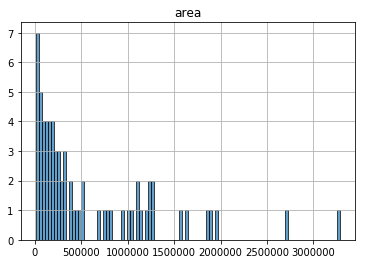

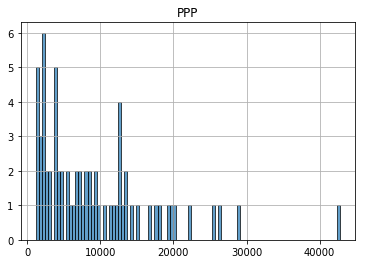

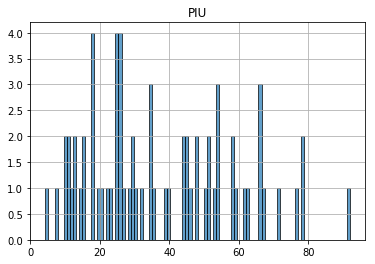

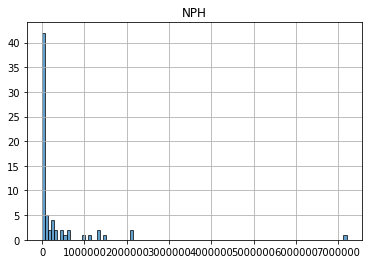

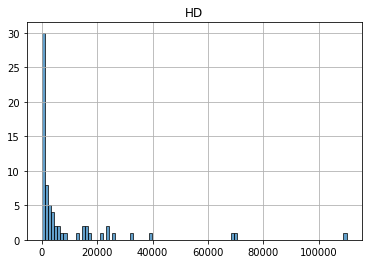

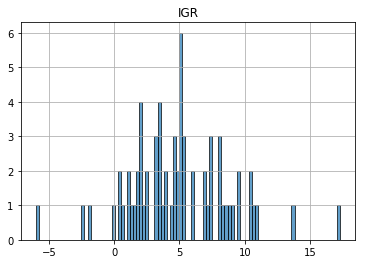

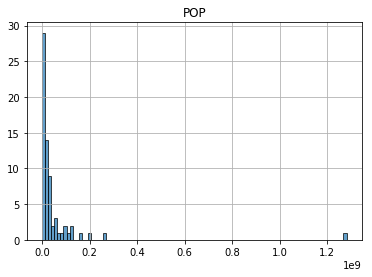

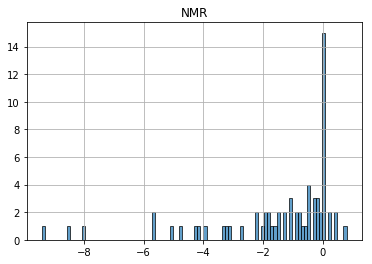

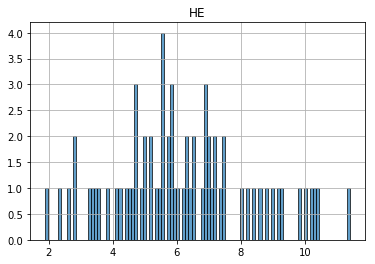

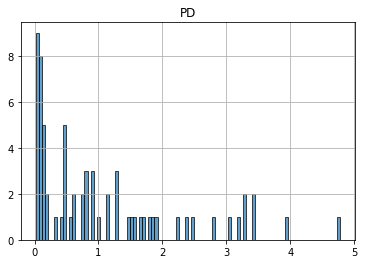

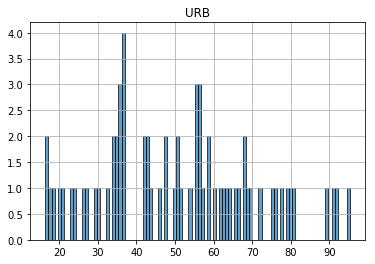

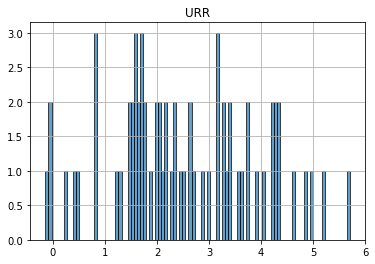

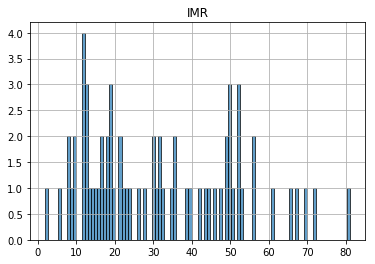

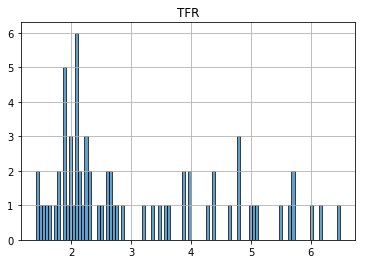

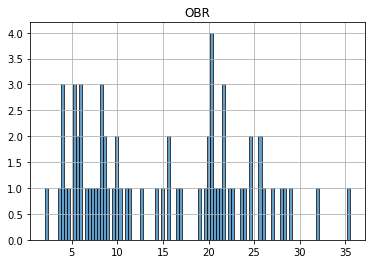

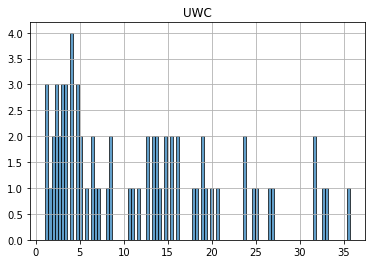

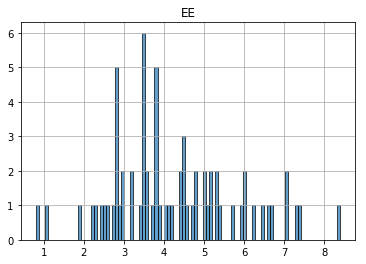

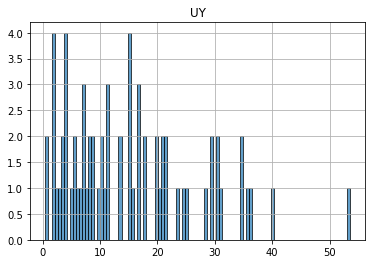

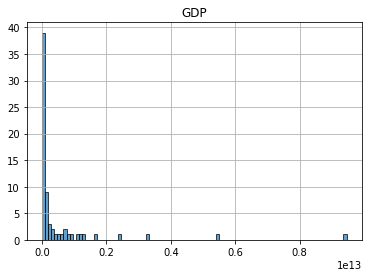

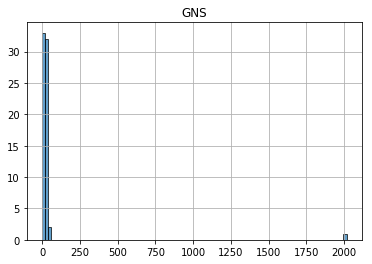

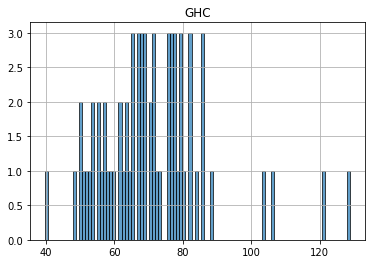

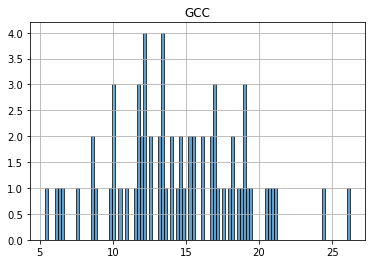

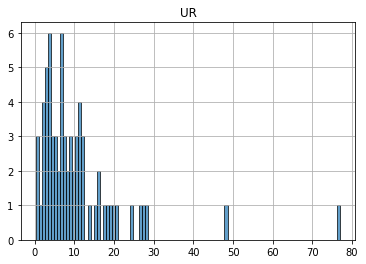

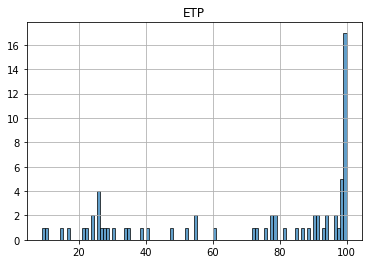

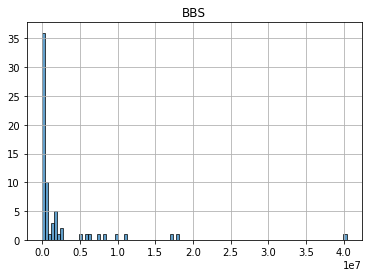

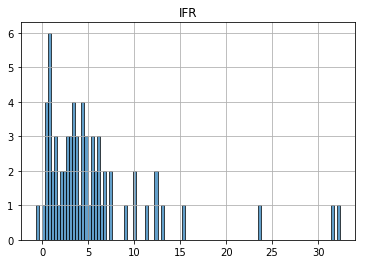

In [33]:
#examine distrubtion of each variable
plt.close('all')
for i in range(0,len(MetaData.columns)):
    MetaData.hist(MetaData.columns[i],bins=100,edgecolor='k',alpha=0.7)

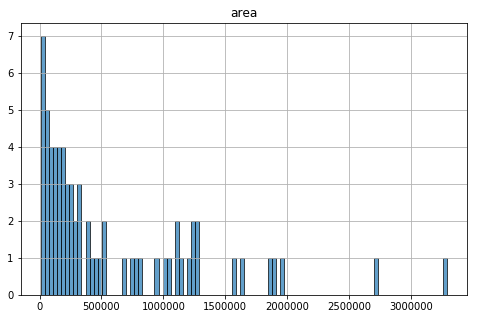

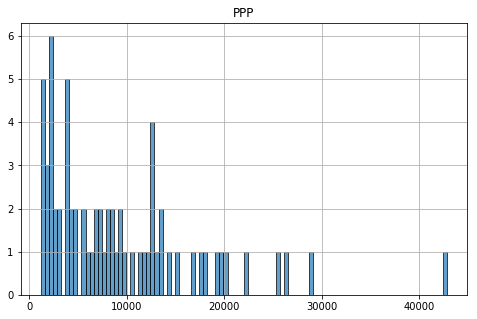

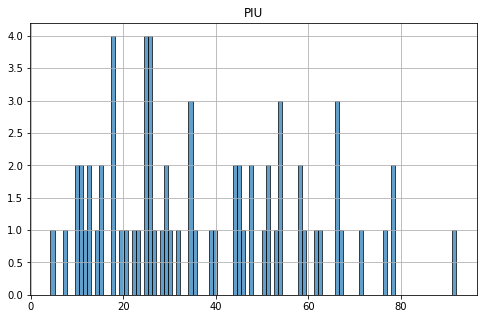

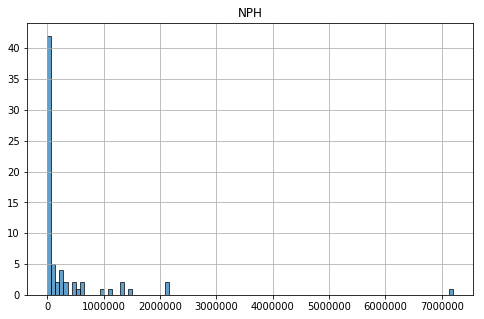

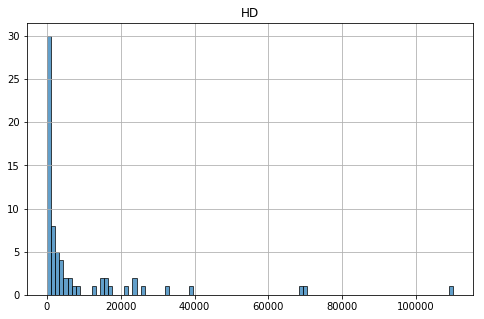

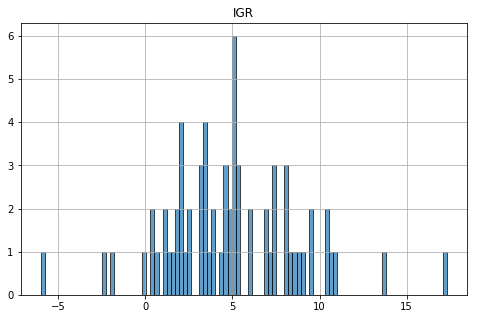

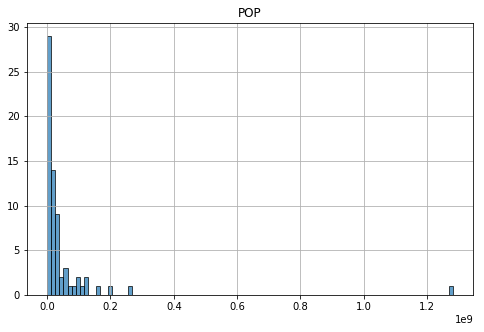

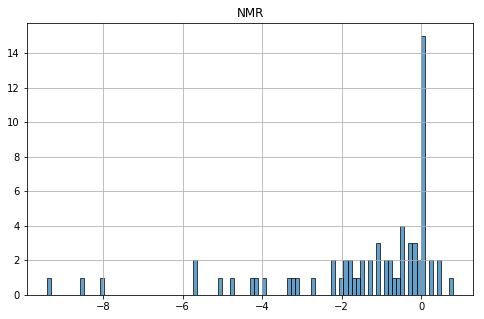

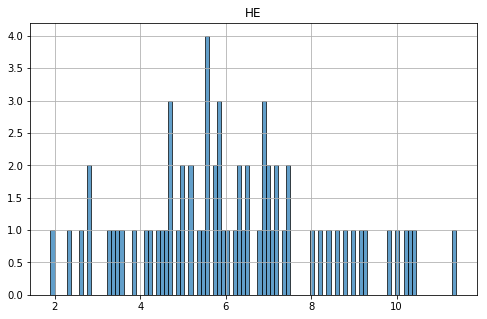

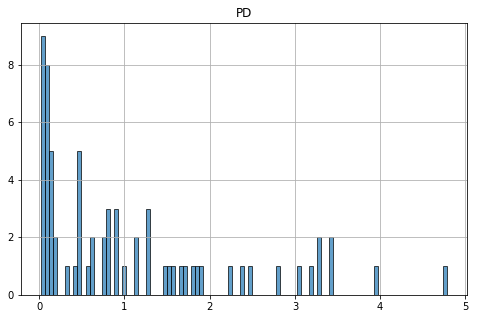

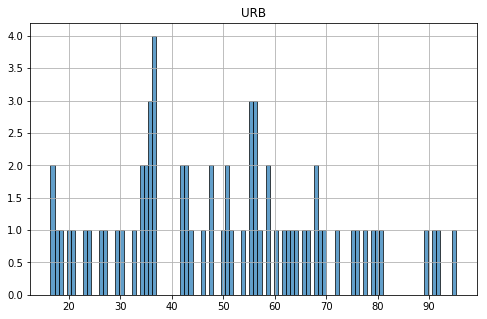

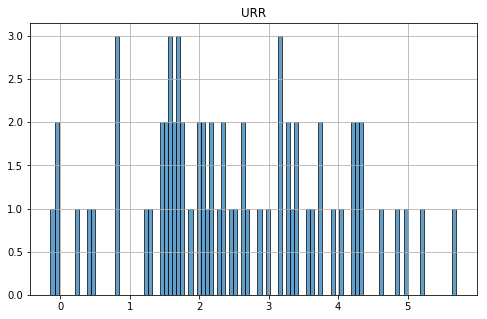

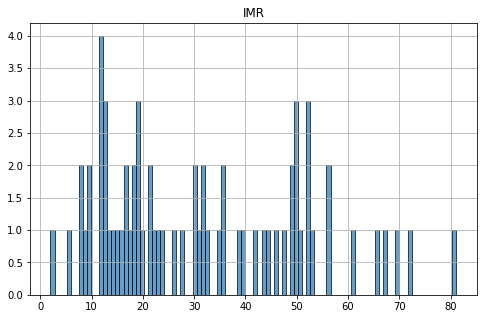

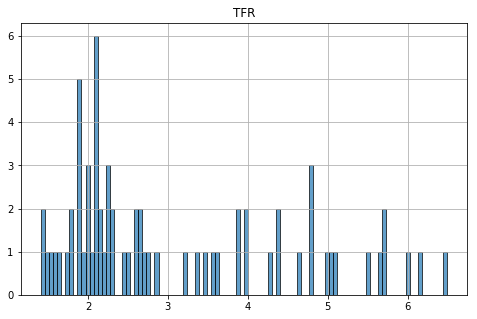

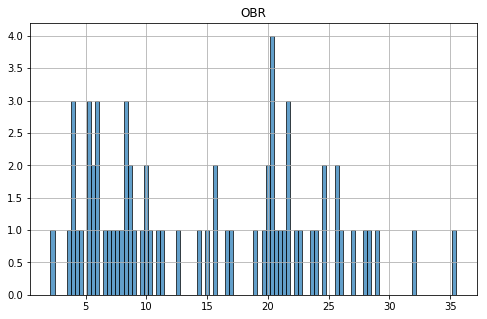

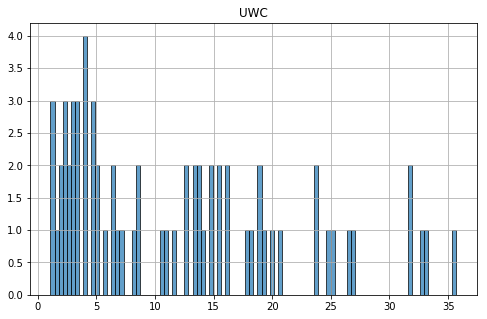

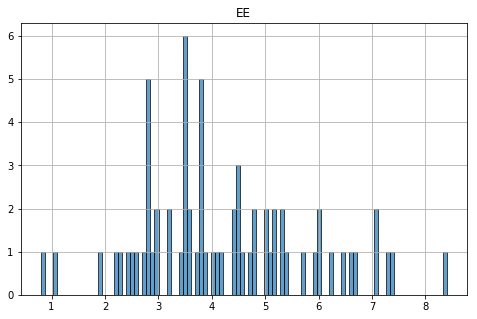

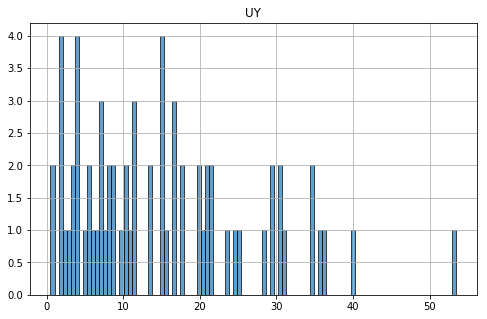

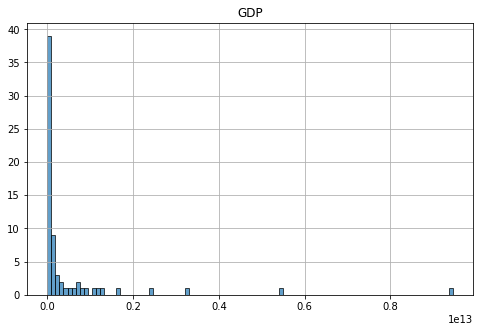

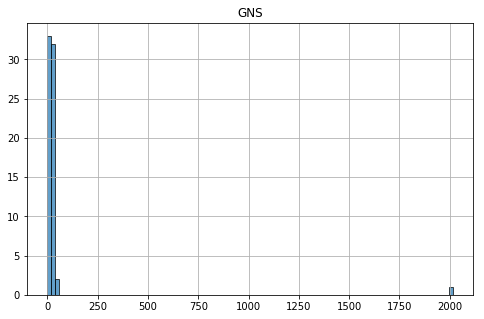

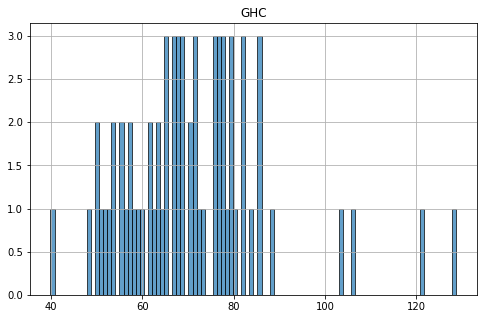

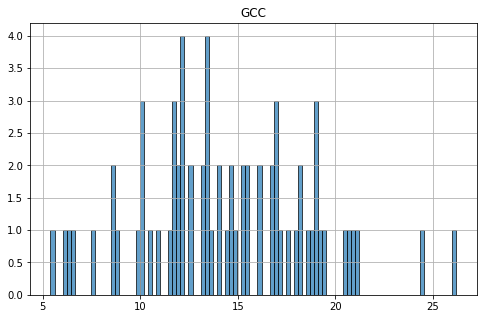

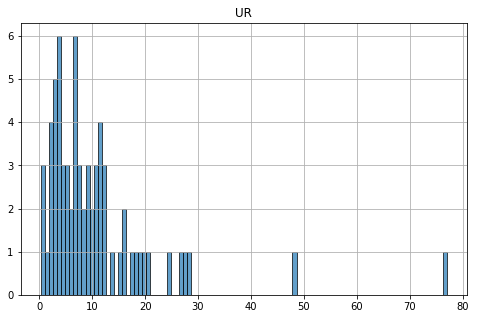

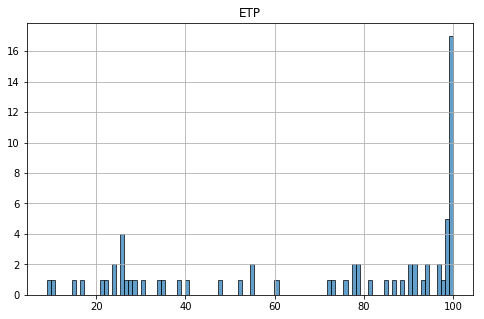

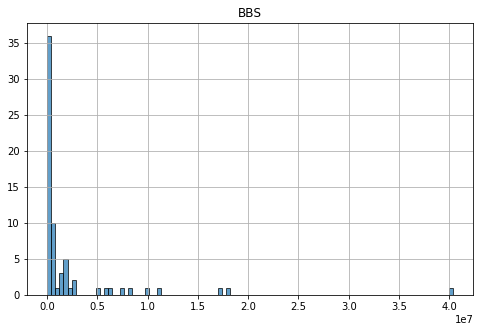

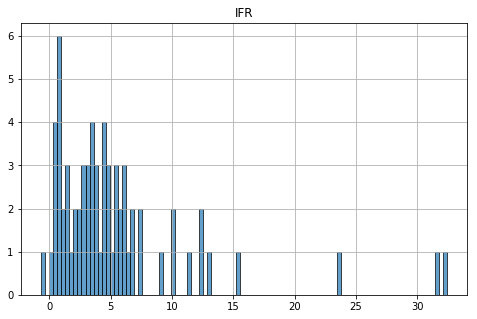

In [34]:
#examine distrubtion of each variable after removing oceans and antarctica from list
plt.close('all')
RemoveAreaInd=MetaData['area']<0.2*10**9 # oceans and antarctica are massive - this threshold removes them
MetaData=MetaData[RemoveAreaInd]

for i in range(len(MetaData.columns)):
    MetaData.hist(MetaData.columns[i],bins=100,figsize=(8,5),edgecolor='k',alpha=0.7)#

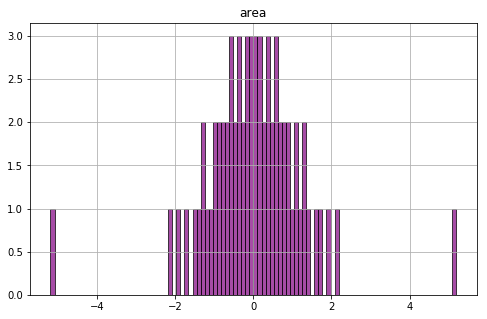

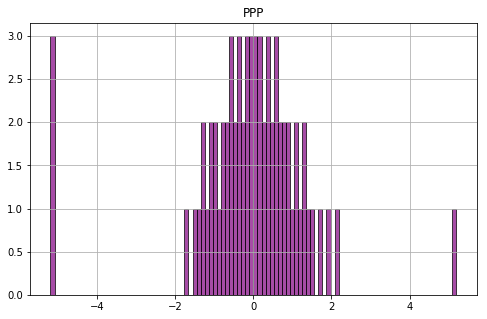

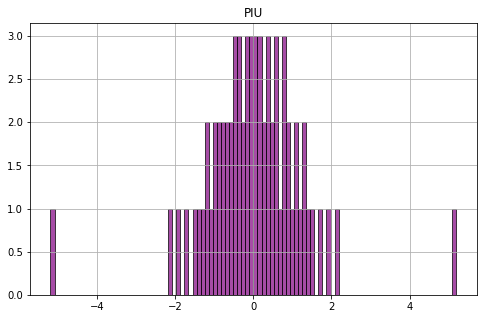

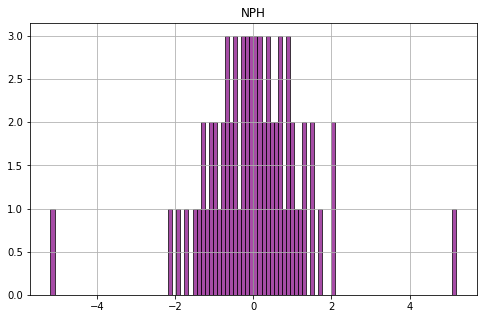

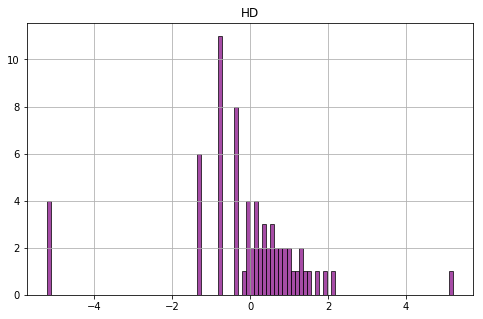

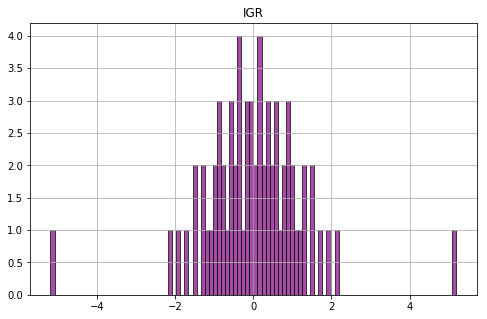

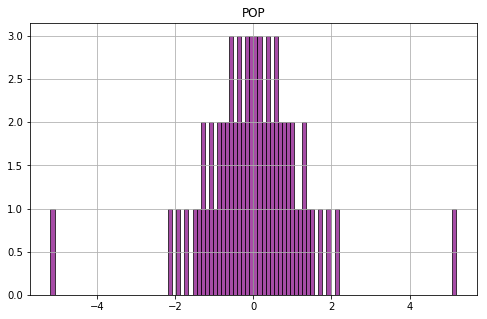

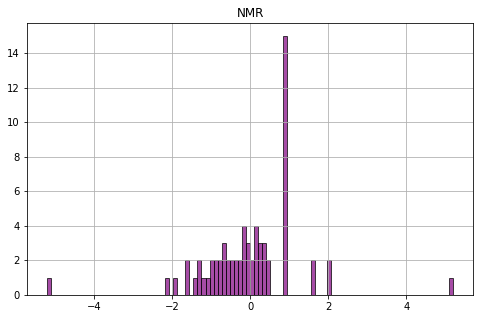

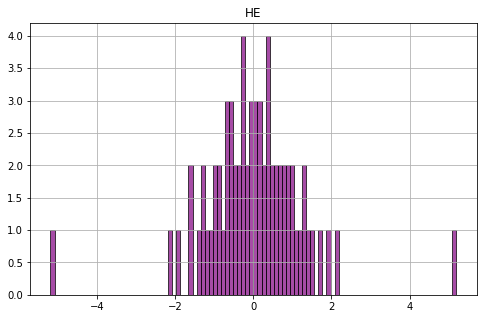

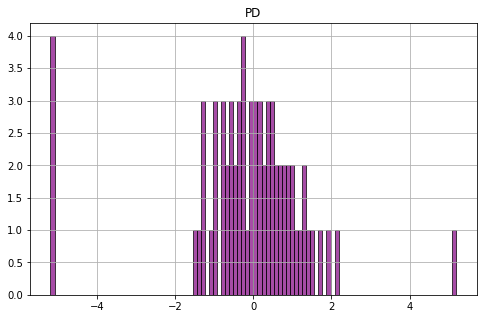

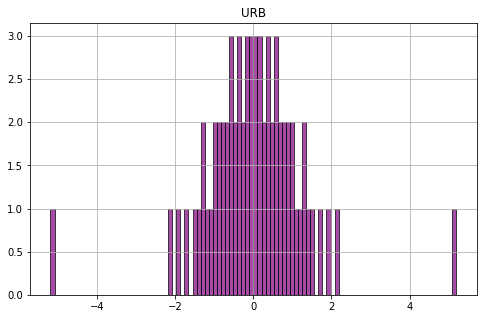

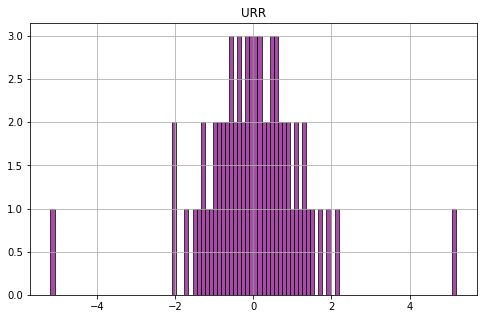

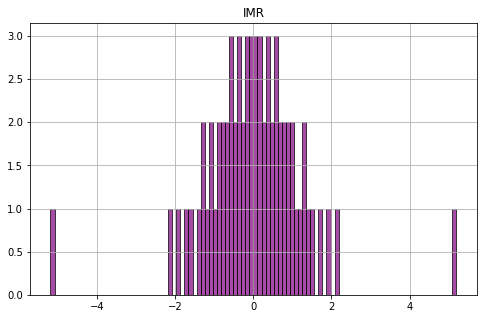

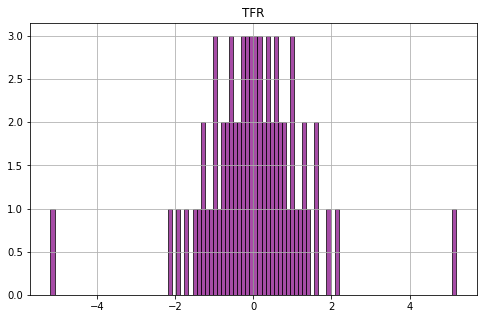

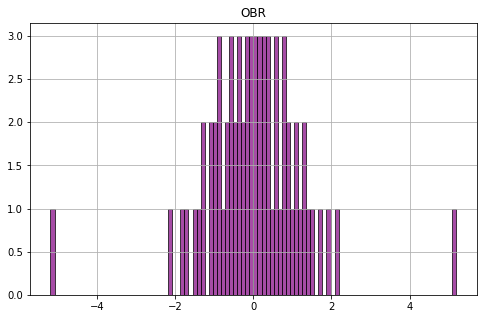

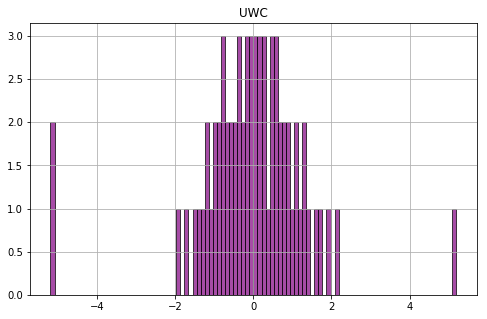

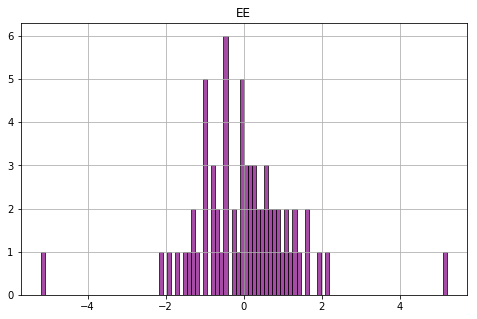

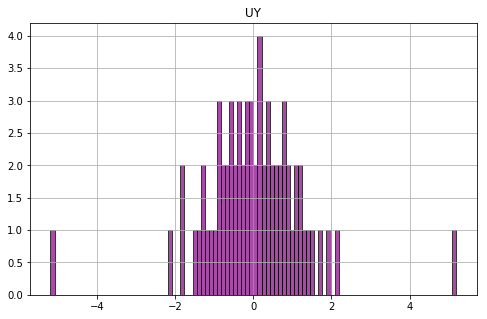

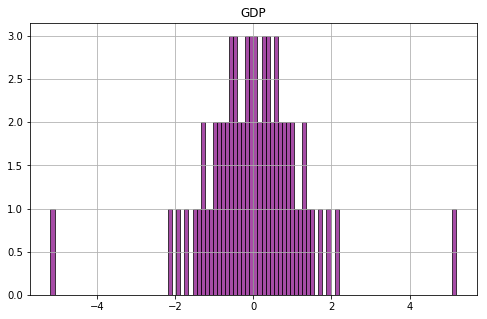

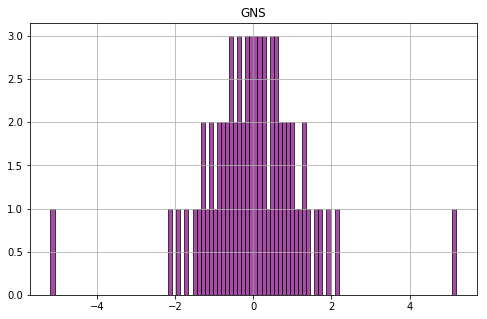

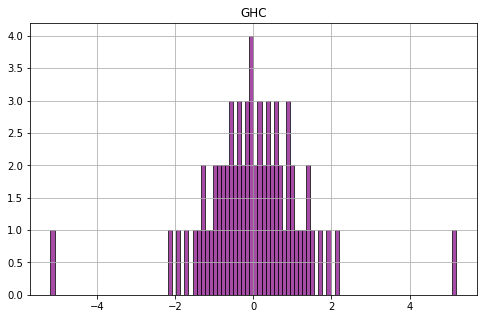

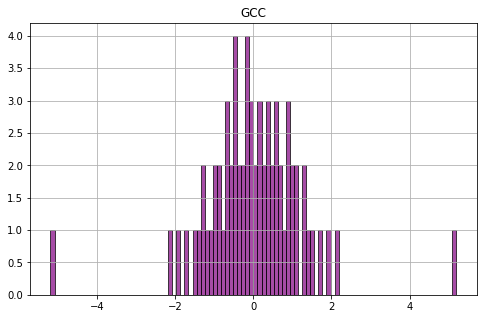

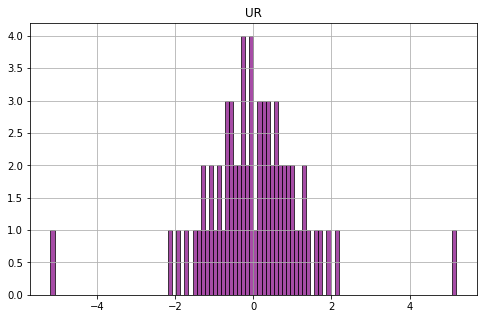

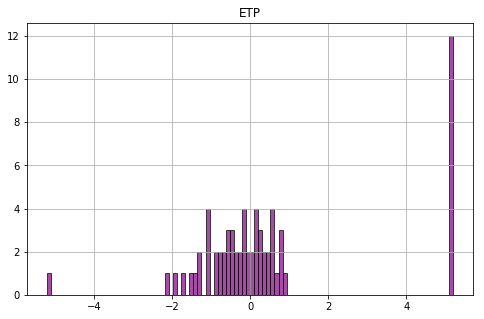

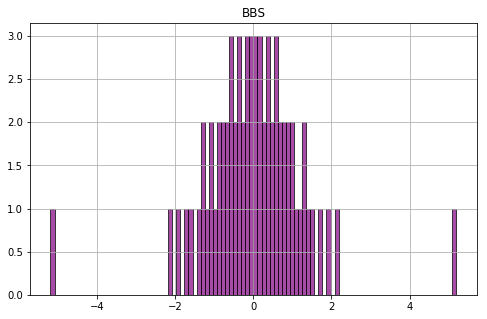

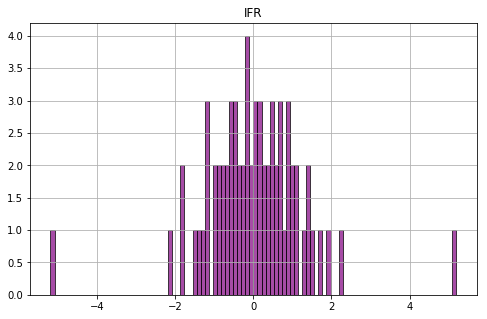

In [36]:
#because many varaibles have log distributions use Quantile tranfornsmation to normalize the dist.
# helps latter and many of the ML assume normal distribution

from sklearn.preprocessing import QuantileTransformer
qt = QuantileTransformer(output_distribution='normal')
temp = qt.fit(MetaData).transform(MetaData) #can reverse to original scale later with .inversetransform()

MetaDataQT=pd.DataFrame(temp, columns=['area', 'PPP', 'PIU','NPH', 'HD','IGR', 'POP', 'NMR', 'HE', 'PD',
                                        'URB', 'URR', 'IMR', 'TFR', 'OBR', 'UWC', 'EE', 'UY', 'GDP', 'GNS', 
                                        'GHC', 'GCC', 'UR', 'ETP', 'BBS', 'IFR'],index=MetaData.index)
#replot not that the data is on a normal distrubition
plt.close('all')
for i in range(len(MetaDataQT.columns)):
    MetaDataQT.hist(MetaDataQT.columns[i],bins=100,figsize=(8,5),color='purple',edgecolor='k',alpha=0.7)#

[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   2 out of   5 | elapsed:    3.2s remaining:    4.9s
[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed:    4.9s finished


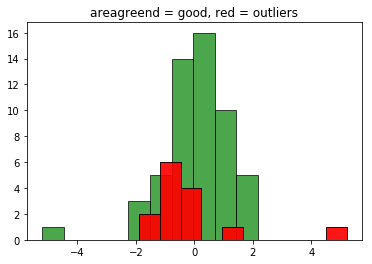

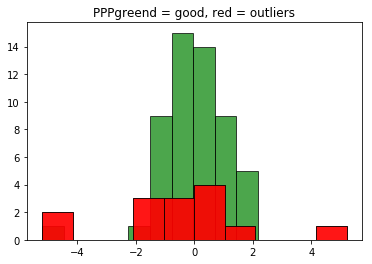

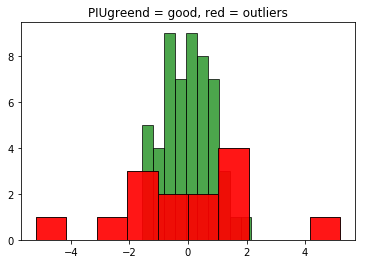

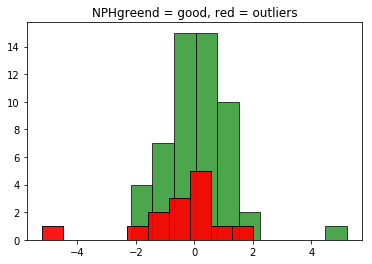

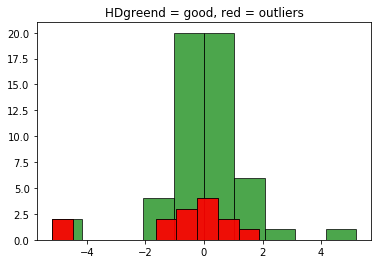

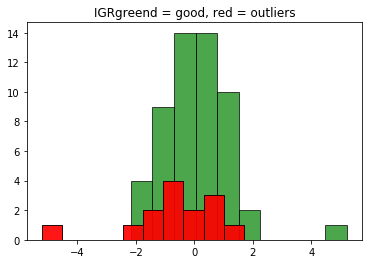

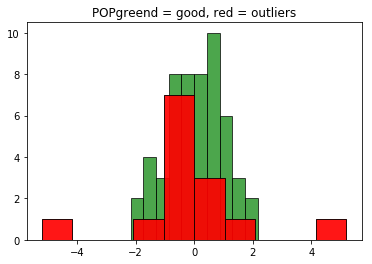

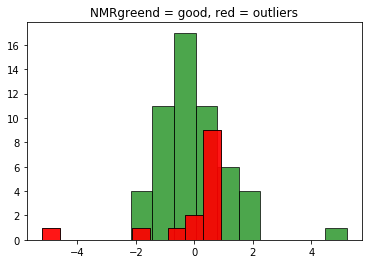

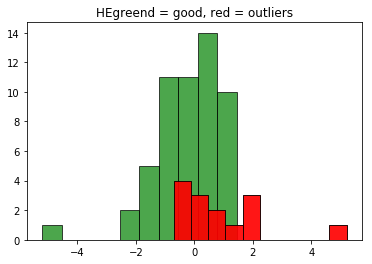

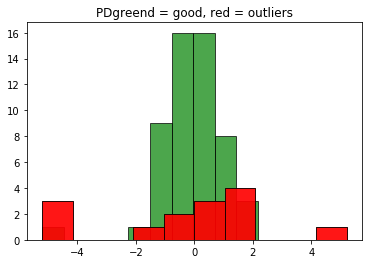

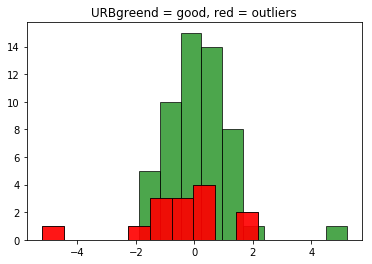

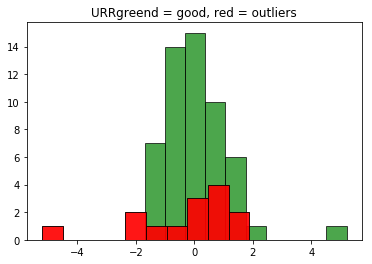

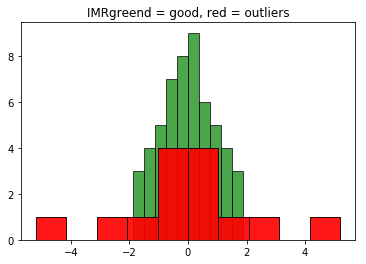

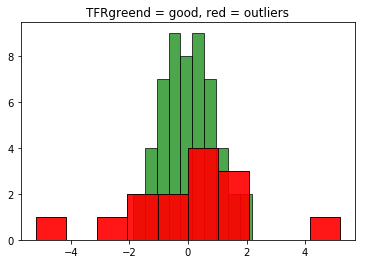

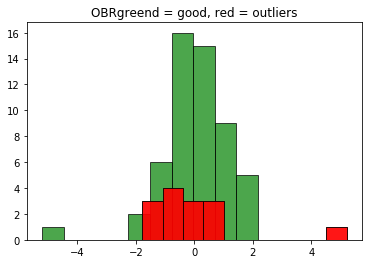

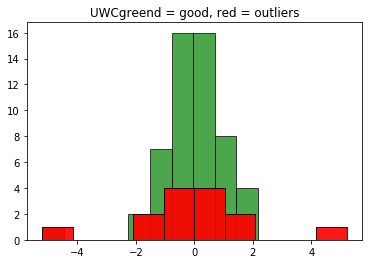

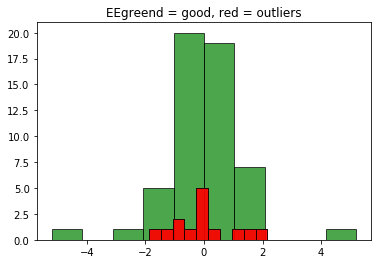

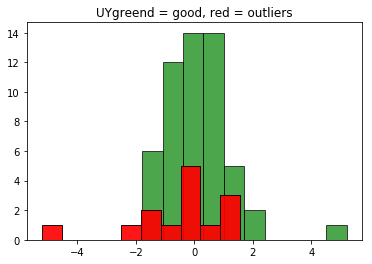

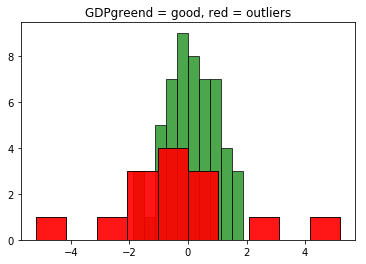

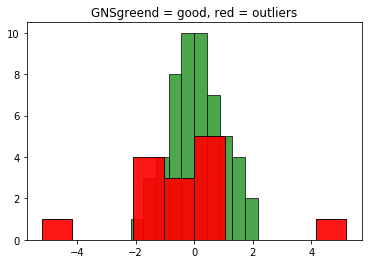

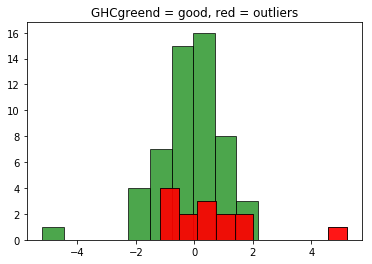

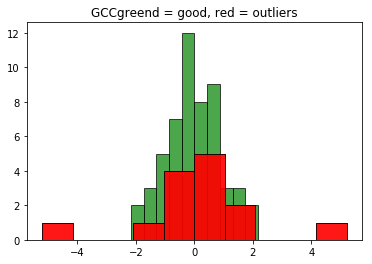

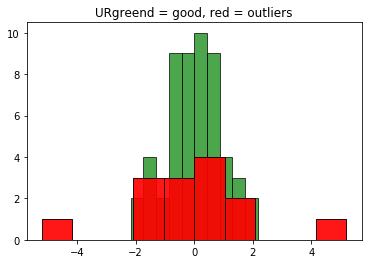

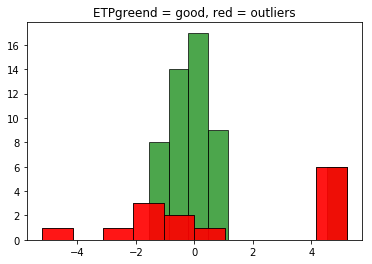

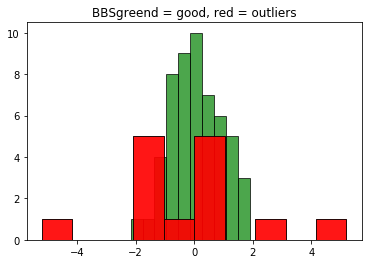

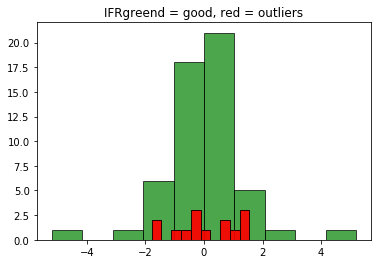

In [ ]:
# use and IsolationForest to get outliers - outlier is determined over all factors - and so may produce unexpected
# restults - chose your contamination level - if you can't get a good depiction of outliers the jstu set a standard
# threshold for artifact rejection across metrics (since data is quant normalized only 1 threshold for both
# each extreme within a variable and also acroos variables)
from sklearn.ensemble import IsolationForest
contLev=.2
happyOut=False

while happyOut==False:
    iso=IsolationForest(max_features=1.0, n_jobs=5, behaviour="new", verbose=1,contamination= contLev) # do over 5 cores
    iso.fit(MetaDataQT)
    outlierInd=iso.decision_function(MetaDataQT) # outliers are labelled wirth -1

    AllClean=MetaDataQT[(outlierInd>=0)]
    OutlierData=MetaDataQT[(outlierInd<0)]

    #plot the good (green) and outlier (red) data
    for i in range(0,len(AllClean.columns)):
        plt.figure(i)
        plt.title(AllClean.columns[i] + "greend = good, red = outliers")
        plt.hist(AllClean[AllClean.columns[i]],bins=10,color='green',edgecolor='k',alpha=0.7)#cleandata
        plt.hist(OutlierData[OutlierData.columns[i]],bins=10,color='red',edgecolor='k',alpha=0.7)#cleandata
        plt.hist(OutlierData[OutlierData.columns[i]],bins=10,color='red',edgecolor='k',alpha=0.7)#cleandata
        plt.show()
    HappyQ=raw_input("Good outlier detection (red in graphs above) (g = good and so proceed with script)  ")
    if HappyQ == "g":
        happyOut = True
    elif HappyQ == "G":
        happyOut = True 
    else:             
        NQ=raw_input("Chose contamination (0-1) or enter threshold to do artifact rejection by hard threshol")
        if NQ == "threshold":
            #set a threshold         
            ThresholdLevel=float(raw_input("Enter artifact rejection threshold " +
                                 "\n because data is quart normalized only 1 value for both extremes  "))
            AllClean=MetaDataQT[(MetaDataQT>-ThresholdLevel) &  (MetaDataQT<ThresholdLevel)]
            OutlierData=MetaDataQT[(MetaDataQT<-ThresholdLevel) | (MetaDataQT>ThresholdLevel)]

            AllClean.dropna(axis=0, how='any', thresh=None, subset=None, inplace=True)
            OutlierData.dropna(axis=0, how='all', thresh=None, subset=None, inplace=True)
             
            # plot only the good data, as you know what the bad data is         
            for i in range(0,len(AllClean.columns)):
                plt.figure(i)
                plt.title(AllClean.columns[i])
                plt.hist(AllClean[AllClean.columns[i]],bins=10,color='green',edgecolor='k',alpha=0.7)#cleandata
            
            happyOut = True 
        else:
             #chose a new contamination level for the isolationforest
            contLev=float(NQ)

In [ ]:
#pick which variable you want to target
input_Str="which target varible - choses are u'...' '", AllClean.columns
targetDataName=raw_input(input_Str)
print "target variable selected is " + targetDataName
y=AllClean[AllClean.columns[AllClean.columns==targetDataName]]
X=AllClean[AllClean.columns[AllClean.columns!=targetDataName]]

In [ ]:
# show how each factor accounts for variance in target variable
# produce linear regressions as well scatter for for all X[i] to Y combinations

import seaborn as sns
from scipy.stats import linregress
sns.set_style('ticks')

y_array = y[y.columns[0]] #get list of Y data

for c in range(0,len(X.columns)):
    x_array = X[X.columns[c]] #get list of X[i] data
    
    fig, ax = plt.subplots()
    ax.grid(True)
    ax.set_xlabel(X.columns[c],fontsize=18)
    ax.set_ylabel(y.columns,fontsize=18)
    slope,intercept,rvalue,pvalue,stderr = linregress(x_array,y_array)
    s="Effect of metric on chosen target metric \n Slope: " + str(round(slope,3)) + " / R^2: " + str(round(rvalue,3)) + " / p value:" + str(round(pvalue,3))
    #s="Effect of metric on \n", "Slope: " + str(round(slope,3)) + " / R^2: " + str(round(rvalue,3)) + " / p value:" + str(round(pvalue,3))
    ax.set_title(s,fontsize=20)
    fig.set_size_inches(6, 5)
    g=sns.regplot(data=MetaData,x=x_array,y=y_array,ax=ax,
                  line_kws={'ls':'--','linewidth':3,'color':'k'},
                  scatter_kws={'edgecolor':'k'})
    plt.show()

In [ ]:
# get cluster within target variable
# use KernelDensity to pick out clusters of density of y
# then assign each value y to its cluster and output e - a line plot of the density function
# basically adjust bandwidth till you see the local maxs you want

y.hist(bins=100,color='black',edgecolor='k',alpha=0.7)#cleandata
plt.ylabel('Count')
plt.xlabel('Scaled values for ' + targetDataName)
plt.title(targetDataName + "\n Distrubition of Targert Varible")
plt.show()

from sklearn.neighbors.kde import KernelDensity
from numpy import linspace

bandWSelect=1.0
happyband=False

while happyband==False:
    y.hist(bins=100,color='black',edgecolor='k',alpha=0.7)#cleandata
    plt.xlim((int(y.min())*2,int(y.max())*2))
    plt.ylabel('Count')
    plt.xlabel('Scaled values for ' + targetDataName)
    plt.title(targetDataName + "\n Distrubition of Targert Varible")
    plt.show()

    kde = KernelDensity(kernel='gaussian', bandwidth=bandWSelect).fit(y)
    s = linspace(int(y.min())*2,int(y.max())*2)
    e = kde.score_samples(s.reshape(-1,1))
    plt.plot(s, e)
    plt.show()
    goodQ=raw_input("Good band witdh (g=proceed)? Current bandwidth is " + str(bandWSelect) + "  ")
    if goodQ == "g":
        happyband=True
    elif goodQ=="G":
        happyband=True
    else:
        bandWSelect=float(raw_input("Pick a band width "))        

In [ ]:
# find local max and mins from kernel density function of y function above
#assign each y to it's corresponding cluster and output as yCats
from scipy.signal import argrelextrema
mi, ma = argrelextrema(e, np.less), argrelextrema(e, np.greater)

SeperateInd=s[mi].tolist()
SeperateInd.append(s[-1]*1.1)

yCats=y.copy()
yCats[:]=0

if s[ma].size==1:
    print "only 1 peak - all points = cluster 1"
    yCats[yCats.columns]=1
else:
    yCats[y.values<SeperateInd[0]]=1
    # ? how do you do thins a list comphrension
    #(yCats[(y>SeperateInd[CurrInd-1]) &  (y<SeperateInd[CurrInd])]=CurrInd+1  for CurrInd in range(1,len(SeperateInd)))
    for CurrInd in range(1,len(SeperateInd)):
        yCats[(y>SeperateInd[CurrInd-1]) &  (y<SeperateInd[CurrInd])]=CurrInd+1

In [ ]:
# plot x[i] versus y - with points colored by y cluster - sanity check
for c in range(0,len(X.columns)):
    plt.scatter(X.values[:, [c]], y.values[:], c=yCats.values)
    plt.xlabel(X.columns[c])
    plt.ylabel(y.columns[0])
    plt.title("Scatter of X vs Y - Color denote clusters of Y")
    plt.show()

In [ ]:
# plot x[] vs x[+1] for all combinations and have it colored by clusters of y - see if this informs anythign
import itertools
CombOfXInd=list(itertools.combinations(range(len(X.columns)), 2))

for c in range(0,len(CombOfXInd)):
    plt.scatter(X.values[:, CombOfXInd[c][0]], X.values[:, CombOfXInd[c][1]], c=yCats.values[:,0])
    plt.xlabel(X.columns[CombOfXInd[c][0]])
    plt.ylabel(X.columns[CombOfXInd[c][1]])
    plt.title("Scatter of Factors with Clusters of target in colour")
    plt.show()